In [22]:
# -*- coding: utf-8 -*-
%matplotlib inline

import os
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from twnews.utils.memoize import load
from twnews.utils.text_processors import to_unicode, is_word
from nltk.tokenize import word_tokenize

dataset = load('dataset')
stopwords = stopwords.words('russian')

In [2]:
def split_text(text):
    text = to_unicode(text)
    words = word_tokenize(text)
    words = filter(is_word, words)    
    words = filter(lambda x: x not in stopwords, words)
    return set(words)

tweets = dataset.tweets.get_dataset_texts()
news = dataset.news.get_dataset_texts()
print len(tweets), len(news)


4324 13711


In [61]:
MARKDOWN_DIR = '/home/avybornov/git/twnews/dataset_markdown/'

files = ['1_filtred_alpha/manual_tweets',
         '2_filtred_beta/manual_tweets',
         '3_filtred/0/manual_tweets',
         '3_filtred/1000/manual_tweets',
         '3_filtred/2000/manual_tweets',
         '3_filtred/3000/manual_tweets',
         '3_filtred/4000/manual_tweets',
]
manual_tweets = []

for file_suffix in files:
    docs = load(os.path.join(MARKDOWN_DIR, file_suffix))
    manual_tweets.append((file_suffix, docs))
    print file_suffix, len(docs)


1_filtred_alpha/manual_tweets 555
2_filtred_beta/manual_tweets 254
3_filtred/0/manual_tweets 172
3_filtred/1000/manual_tweets 150
3_filtred/2000/manual_tweets 168
3_filtred/3000/manual_tweets 171
3_filtred/4000/manual_tweets 146


In [62]:
def prnt(l):
    for x,s in l:
        print '\t', x, len(s)

def get_intersection(tweets, news):
    intersection_lengths = []
    intersection_lengths_normalized_by_news = []
    intersection_lengths_normalized_by_tweets = []
    
    for tweet in tweets:
        #print tweet
        tweet_words = split_text(tweet.text)

        news_found = False
        
        for url in tweet.urls:
            
            if dataset.news.exists(url):
                single_news = dataset.news.get(url)
                single_news_words = split_text(single_news.title)
                # print '\t',single_news, len(tweet_words.intersection(single_news_words))
                length = len(tweet_words.intersection(single_news_words))
                #if len(single_news_words) <= len(tweet_words):#length*1.0/len(single_news_words) != 1.0:
                intersection_lengths.append(length)
                intersection_lengths_normalized_by_news.append(length*1.0/len(single_news_words))
                intersection_lengths_normalized_by_tweets.append(length*1.0/len(tweet_words))
                news_found = True
                break
                
        if not news_found:
            raise Exception(tweet)
    return intersection_lengths, intersection_lengths_normalized_by_news, intersection_lengths_normalized_by_tweets


def get_unique_word_in_tweet(tweets, news):       
    unique_tweets = []
    unique_tweets_normalized_by_tweets = []
    for tweet in tweets:
        #print tweet
        tweet_words = split_text(tweet.text)

        news_found = False
        for url in tweet.urls:
            if dataset.news.exists(url):
                single_news = dataset.news.get(url)
                single_news_words = split_text(single_news.title)
                #length = len([word for word in tweet_words if word in single_news_words])
                unique_tweets_length = len([word for word in tweet_words if word not in single_news_words])
                unique_tweets.append(unique_tweets_length)
                unique_tweets_normalized_by_tweets.append(unique_tweets_length*1.0/len(tweet_words))
                news_found = True

        if not news_found:
            raise Exception(tweet)
            
    return unique_tweets, unique_tweets_normalized_by_tweets

In [63]:
def analyze(tweets, news):
    inter, inter_by_news, inter_by_tweets = get_intersection(tweets, news)

    plt.title(u'Гистограмма длины пересечения слов твита и заголовка новости, нормализованной по длине заголовка')
    plt.xlabel(u'Нормализованная длина пересечения')
    plt.ylabel(u'Количество пар твит-новость')

    plt.hist(inter_by_news)
    plt.show()

    unique_word, unique_word_by_tweet = get_unique_word_in_tweet(tweets, news)

    import numpy as np
    X = np.arange(0,1.02,0.01)
    Y = [len(filter(lambda score: score < x, unique_word_by_tweet)) for x in X]
    X = map(lambda x: x*100, X)
    Y = map(lambda y: len(tweets)-y,Y)
    print 'Больше чем на половину уникальных твитов %s %.2f%%' % (Y[50], Y[50]*100.0/len(tweets))
    plt.plot(X,Y)

    plt.axis([-1, 102, -1, 4000])
    plt.title(u'Зависимость суммарного количества пар от доли уникальных слов в твите')
    plt.xlabel(u'Процент уникальных слов')
    plt.ylabel(u'Количество пар твит-новость')
    plt.show()

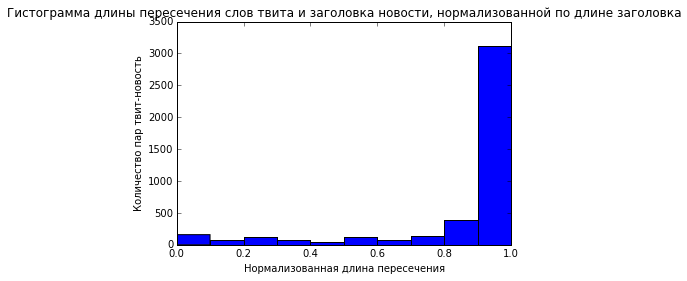

Больше чем на половину уникальных твитов 785 18.15%


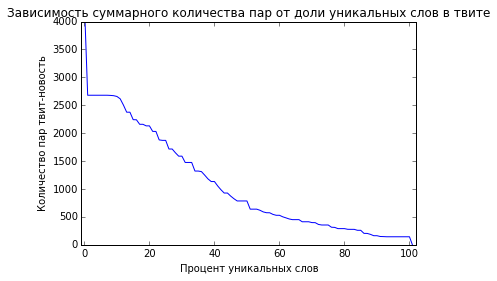

In [64]:
# automatic dataset
analyze(tweets, news)

In [65]:
manual_1 = manual_tweets[0][1]
manual_2 = manual_tweets[1][1]
manual_3 = manual_tweets[2][1]
manual_3.extend(manual_tweets[3][1])
manual_3.extend(manual_tweets[4][1])
manual_3.extend(manual_tweets[5][1])
manual_3.extend(manual_tweets[6][1])

manual_1 555


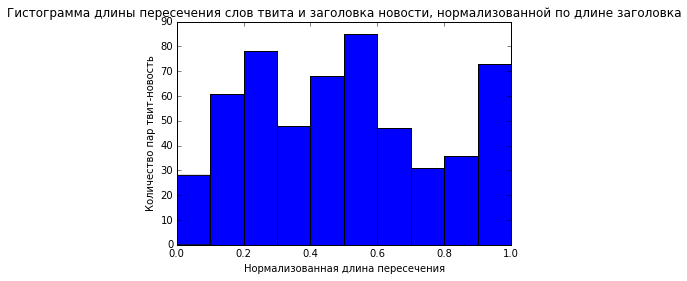

Больше чем на половину уникальных твитов 346 62.34%


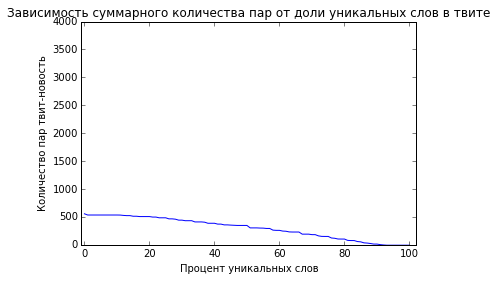

In [66]:
print 'manual_1', len(manual_1)
analyze(manual_1, news)

manual_2 254


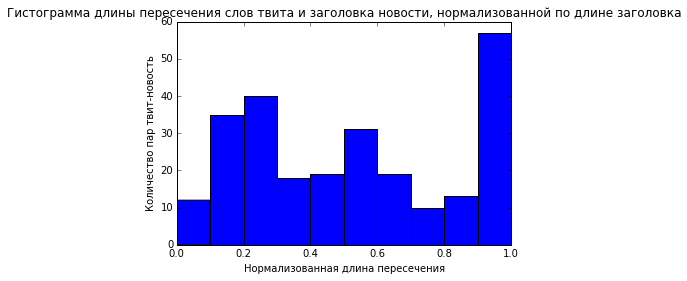

Больше чем на половину уникальных твитов 144 56.69%


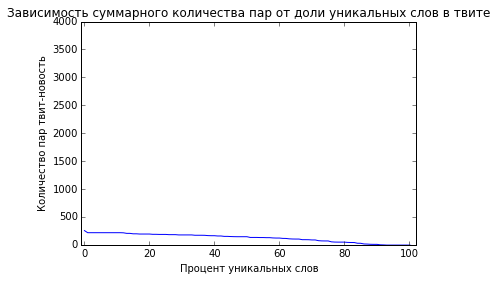

In [67]:
print 'manual_2', len(manual_2)
analyze(manual_2, news)

manual_3 807


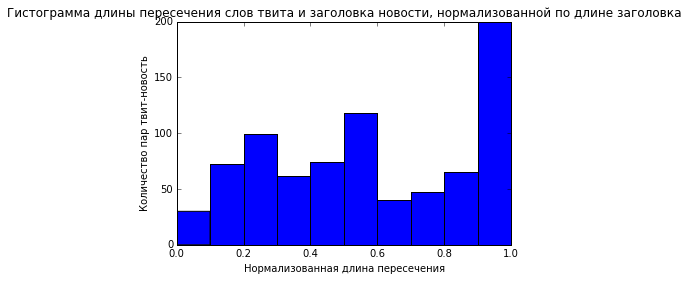

Больше чем на половину уникальных твитов 396 49.07%


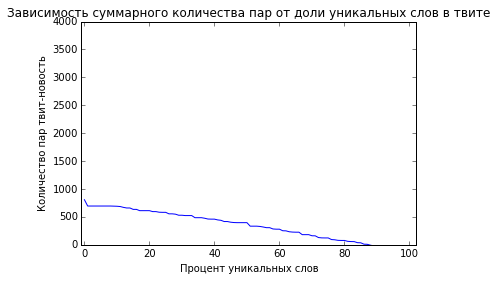

In [68]:
print 'manual_3', len(manual_3)
analyze(manual_3, news)